# Dimensionality Reduction with PCA - Principle Component Analysis 

Dimensionality Reduction ermöglicht kürzere Rechenzeiten und macht den Datensatz mit vielen Parametern für Menschen  lesbarer. Die beliebteste Technik zur Dimensionality Reduction ist die Principle Component Analysis(PCA) = eine Technik des linearen Algebras, die zur Data Preparation verwendet wird, um eine 2D Darstellung eines Datensatzes zu erstellen.

Die mind. 2 Principle Components sind: 

Eine Kombinationen aus den Hauptparametern (zB. Länge x Breite von Blüten)

Der Perspektive auf diese Hauptparameter (Views) = PC1 x Pc2 orthogonal zueinander durch den Mittelpunkt

Projections = Distanz zwischen den Principle Components und den echten Daten

Den Eigenvector/Eigenvalues = Mathematische Werte dieser 

Den Dimensions = Anzahl der Columns im Dataset

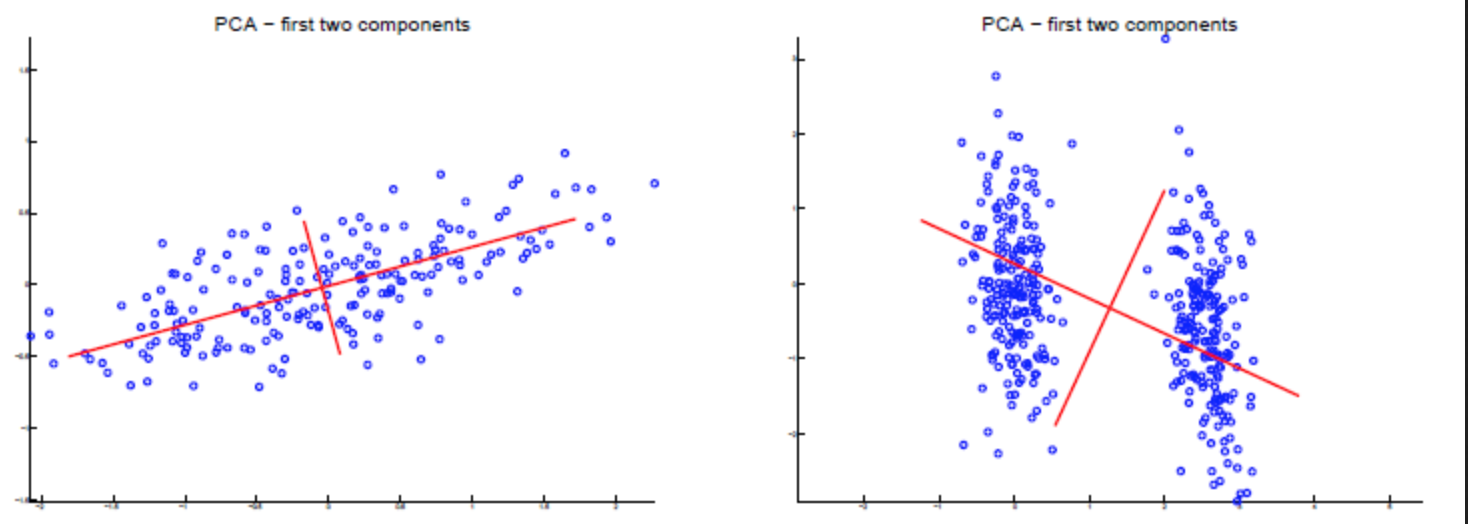

In [3]:
from IPython.display import Image
Image("./pca.png")

# Beispiel: Brustkrebsvoraussage mit 30 Features

In [10]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd, seaborn as sns

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys() #primary keys der tables

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [33]:
print(cancer['target_names']) #output der goals: wie viele PCAs werden wir brauchen?

['malignant' 'benign']


In [27]:
#print(cancer['DESCR']) #output Beschreibung zum Dataset
print(cancer['feature_names']) #output der features

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [29]:
cancer['feature_names'].shape #wieiviele features

(30,)

In [17]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) #daten mit feature names als chead ausgeben 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df.shape #569 zeilen, 30 colums bzw features

(569, 30)

In [21]:
df.isnull().values.any() #gibt es NaN

False

# Standart Scaling & PCA Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaler.data = scaler.transform(df)

PCA Scaling, um die beiden PCA Objekte anzufertigen.
Die Methode hat kein "transform", denn es ist dazu da, die daten zu untersuchen

sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaler.data)

PCA(n_components=2)

In [37]:
pca_n = pca.transform(scaler.data) #
pca_n.shape # im gegensatz zu zuvor 30 features sind es nun nur 2 features

(569, 2)

# Visualisierung

Text(0, 0.5, 'PCA2')

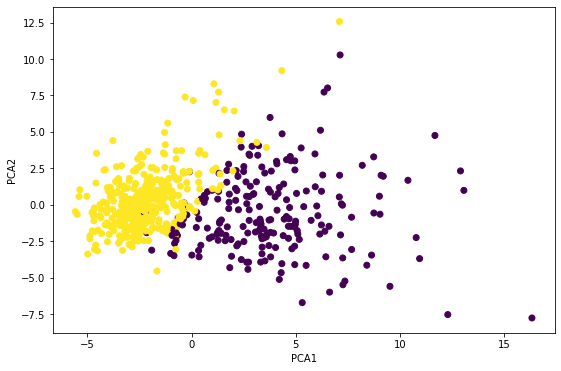

In [47]:
plt.figure(figsize = (9,6)) #größe plot
plt.scatter(pca_n[:,0], pca_n[:,1], c = cancer['target']) #die beiden colums/features
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Die beiden Cluster zeigen jeweils harmlose und gefährliche Tumoren an. Der mittlere Teil, wo beide einander überlappen, sind unklare Fälle.

# Interpretation

Für PCAs ist es schwer zu repräsentieren, was im Rechenprozess passiert ist. Da die Components auf diejenigen reduziert wurden, die einen vorteilhaften "View" auf das Dataset ermöglichen, muss man per Heatmap die Korrelationen finden

In [44]:
pca.components_ #array: jede row 1 Principle Component, jede column= 1 feature, dass dazu genutzt wurde

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<AxesSubplot:>

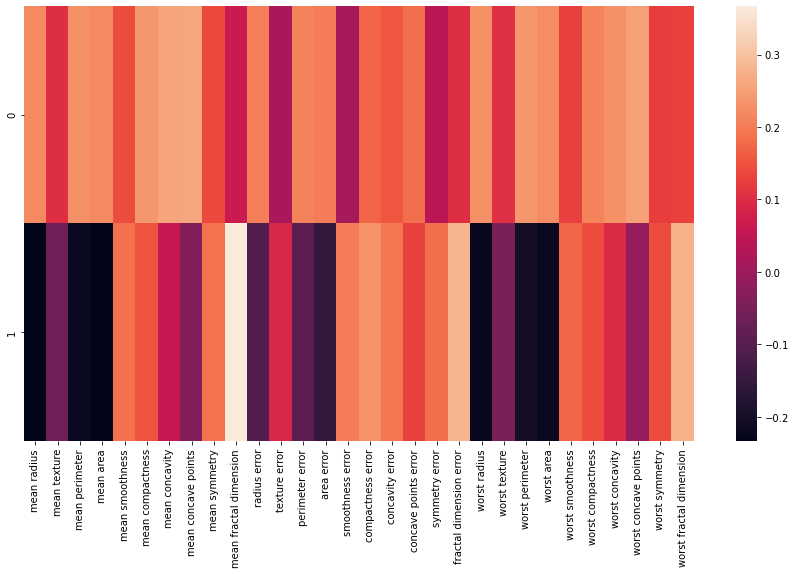

In [45]:
df_pca = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
plt.figure(figsize=(15,8))
sns.heatmap(df_pca)

Die Heatmap zeigt die Correlation zwischen den Features und den Principle Components (in hell)